# Exoplanet Discoveries - Misleading Bias

## 1. Introduction

### 1.1 Tools and Technologies

- Python
- pandas
- numpy
- matplotlib / seaborn
- Jupyter Notebook

### 1.2 Skills Demonstrated

- Data cleaning and preprocessing
- Exploratory data analysis (EDA)
- Visualization and interpretation
- Clear, reproducible analysis

### 1.3 Hypothesis


*Note: This notebook was created in Python 3.11.0*

The discovery of planets outside of our solar system is an extremely new concept which lacks many effective methods. With such minimal techniques to find these planets, the data suggests a higher proportion of large planets than there may actually be in the universe. 

The transit method is far and away the most popular technique for discovery. This involves measuring a star's brightness and noting dips, where a dip in brightness indicates a planet moving in front and blocking light. In order for this to work, the planet must be large enough to cause a measureable dip in brightness, removing the possibility of Earth-sized planets being detected. Through analysis of *NASA's* exoplanet data, my goal is to show that Jupiter-sized exoplanets are not more common, only more represented.

## 2. Method

### 2.1 Data collection

In [13]:
# Importing all necessary libraries
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Opening csv
df = pd.read_csv('exoplanets.csv')

display(df.head(3))
df.info()

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_masslim,st_massn,st_rad,st_raderr1,st_raderr2,st_radlim,st_radn,pl_nnotes,rowupdate,pl_facility
0,HD 180314,b,HD 180314 b,Radial Velocity,0,1,396.03,0.62,-0.62,0.0,...,0.0,4,8.13,0.3,-0.3,0.0,4,0,2018-09-06,Subaru Telescope
1,HD 180902,b,HD 180902 b,Radial Velocity,0,1,510.90,1.50,-1.50,0.0,...,0.0,5,4.16,NaN,NaN,0.0,5,0,2018-12-06,W. M. Keck Observatory
2,HD 181342,b,HD 181342 b,Radial Velocity,0,1,564.10,4.10,-4.10,0.0,...,0.0,6,4.71,NaN,NaN,0.0,6,0,2018-12-06,W. M. Keck Observatory


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4367 entries, 0 to 4366
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_hostname      4367 non-null   object 
 1   pl_letter        4367 non-null   object 
 2   pl_name          4367 non-null   object 
 3   pl_discmethod    4367 non-null   object 
 4   pl_controvflag   4367 non-null   int64  
 5   pl_pnum          4367 non-null   int64  
 6   pl_orbper        4223 non-null   float64
 7   pl_orbpererr1    4046 non-null   float64
 8   pl_orbpererr2    4046 non-null   float64
 9   pl_orbperlim     4244 non-null   float64
 10  pl_orbpern       4367 non-null   int64  
 11  pl_orbsmax       2618 non-null   float64
 12  pl_orbsmaxerr1   1811 non-null   float64
 13  pl_orbsmaxerr2   1810 non-null   float64
 14  pl_orbsmaxlim    2686 non-null   float64
 15  pl_orbsmaxn      4367 non-null   int64  
 16  pl_orbeccen      1592 non-null   float64
 17  pl_orbeccenerr

The csv has been loaded and the data can be accessed, however, there are many unnecessary columns and rows.
***

### 2.2 Data Cleaning

The oiriginal csv has each planet's mass and radius measured based on its ratio with Jupiter. In order to better compare sizes, I am converting it to be proportional with Earth.

In [3]:
# Convert Jupiter mass and radius to Earth for simplicity
mass_conversion = 317.8
radius_conversion = 11.21

df['pl_masse'] = df['pl_bmassj'] * mass_conversion
df['pl_rade'] = df['pl_radj'] * mass_conversion

df = df.drop(columns=['pl_bmassj', 'pl_radj'])

In [4]:
# Remove unnecessary columns and null rows
df.columns = df.columns.str.strip()

keep_columns = columns_to_keep = ['pl_name', 'pl_hostname', 'pl_rade', 'pl_masse',
                                'pl_orbper', 'pl_discmethod', 'pl_orbsmax', 'st_mass', 'st_teff']

df = df[keep_columns].dropna(subset=['pl_rade', 'pl_orbper', 'pl_discmethod'])

display(df.head(3))

num_columns = df.shape[1]
num_rows = df.shape[0]
print(f"Number of columns: {num_columns}")
print(f"Number of rows: {num_rows}")

,pl_name,pl_hostname,pl_rade,pl_masse,pl_orbper,pl_discmethod,pl_orbsmax,st_mass,st_teff
18,Kepler-84 d,Kepler-84,39.0894,NaN,4.224537,Transit,0.052,NaN,6031.0
19,Kepler-84 e,Kepler-84,73.7296,NaN,27.434389,Transit,0.181,NaN,6031.0
20,Kepler-84 f,Kepler-84,62.2888,NaN,44.552169,Transit,0.250,NaN,6031.0


Number of columns: 9
Number of rows: 3336


After removing the 'null' rows and  unnecessary columns, the table is left with 9 columns and 3336 rows.
***

## 3. Analyses

With a clean dataframe to work with, I want to first do some exploratory data analyses to look at the numbers, before graphing the data and finding meaningful relationships. This will provide a good understanding of what the data truly represents, allowing conclusions to be drawn from the original hypohesis.

### 3.1 Exploratory Data Analyses

In [5]:
def classify_radius(r):
    if r < 1.25:
        return "Earth-size"
    elif r < 2.0:
        return "Super-Earth"
    elif r < 4.0:
        return "Mini-Neptune"
    elif r < 6.0:
        return "Neptune-size"
    elif r < 8.0:
        return "Sub-Jupiter"
    elif r < 12.0:
        return "Jupiter-size"
    else:
        return "Super-Jupiter"

df["size_class"] = df["pl_rade"].apply(classify_radius)

"size_class" groups each planet into a category based on its size. Typical classes for these planets are in relation to Earth's size, or when they get too big, Jupiter.
***

In [6]:
print(df.isna().sum())

pl_name             0
pl_hostname         0
pl_rade             0
pl_masse         2504
pl_orbper           0
pl_discmethod       0
pl_orbsmax       1683
st_mass           793
st_teff            68
size_class          0
dtype: int64


This shows that the necessary columns; radius, orbital period, and discovery method have no rows with mising data. 
***

In [7]:
print(df[['pl_rade', 'pl_masse', 'pl_orbper', 'pl_orbsmax']].describe())
print("\n", df['pl_discmethod'].value_counts())

           pl_rade     pl_masse      pl_orbper   pl_orbsmax
count  3336.000000   832.000000    3336.000000  1653.000000
mean    118.993713   402.701939     110.758911     0.198542
std     128.313058   820.500690    3242.951341     2.008272
min       8.262800     0.066738       0.179715     0.005800
25%      44.809800    13.462008       3.928743     0.046660
50%      66.738000   167.003900       8.679444     0.073900
75%     102.331600   407.101800      20.497415     0.130000
max     662.613000  8653.694000  170000.000000    68.000000

 pl_discmethod
Transit                          3303
Radial Velocity                    19
Transit Timing Variations           7
Imaging                             4
Orbital Brightness Modulation       3
Name: count, dtype: int64


Finally, this gives a numerical idea of what the averages are for the necesary columns, as well as the most popular discovery methods.
***

## 3.2 Modelling / Grouped Tables

In [8]:
display(df.groupby("pl_discmethod")[["pl_rade", "pl_masse"]].mean())
df.groupby(["pl_discmethod", "size_class"]).size().unstack(fill_value=0)

,pl_rade,pl_masse
pl_discmethod,,
Imaging,359.114000,3809.627500
Orbital Brightness Modulation,159.429667,213.296767
Radial Velocity,149.499811,180.393985
Transit,118.622434,394.837516
Transit Timing Variations,56.840800,38.136000


size_class,Jupiter-size,Super-Jupiter
pl_discmethod,,
Imaging,0,4
Orbital Brightness Modulation,0,3
Radial Velocity,0,19
Transit,2,3301
Transit Timing Variations,0,7


The discovery method shows a clear pattern in the size that they can detect. As seen before, transit method is the most common method but the average size detected is more than double the transit timing variations. With a limited sample size of 7, the smaller size of transit timing variations highlights the limitations and small data size of its findings, not a high frequency of planets as big as the normal transit suggests.
***

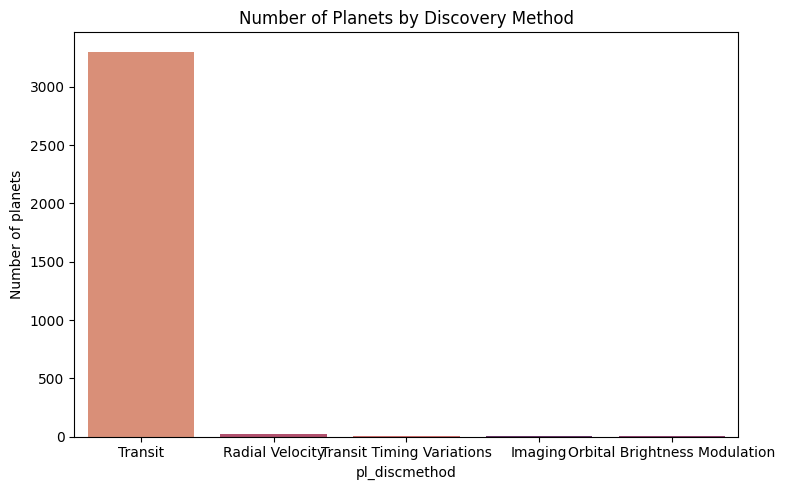

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="pl_discmethod", palette="flare", hue="pl_discmethod", order=df['pl_discmethod'].value_counts().index)
plt.ylabel("Number of planets")
plt.title("Number of Planets by Discovery Method")
plt.tight_layout()
plt.show()

**figure 1:** A simple graph to show the proportion of transit discoveries against other methods
***

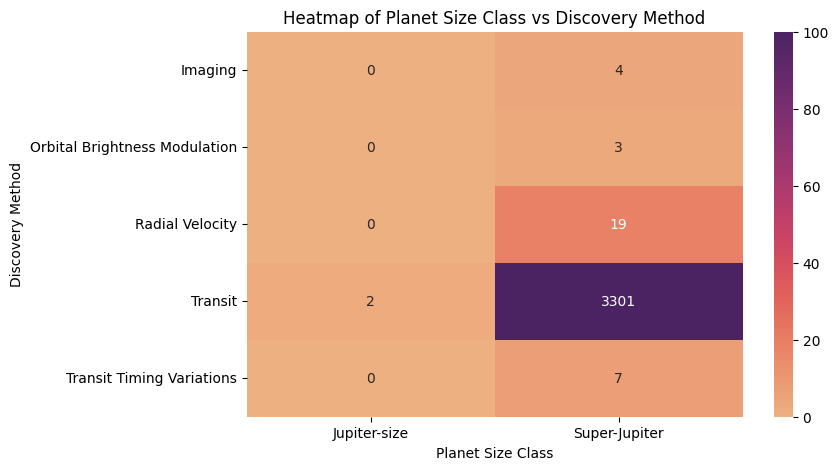

In [10]:
size_counts = df.groupby(["pl_discmethod","size_class"]).size().unstack(fill_value=0)

plt.figure(figsize=(8,5))
sns.heatmap(size_counts, 
            annot=True, 
            fmt="d", 
            cmap="flare", 
            vmin=0, 
            vmax=100
)

plt.ylabel("Discovery Method")
plt.xlabel("Planet Size Class")
plt.title("Heatmap of Planet Size Class vs Discovery Method")
plt.show()

**Figure 2:** This heatmap shows the bias towards larger planets. Each method has more Super-Jupiters than not, with Super-Jupiters found through transits to be the clear dominant type.
***

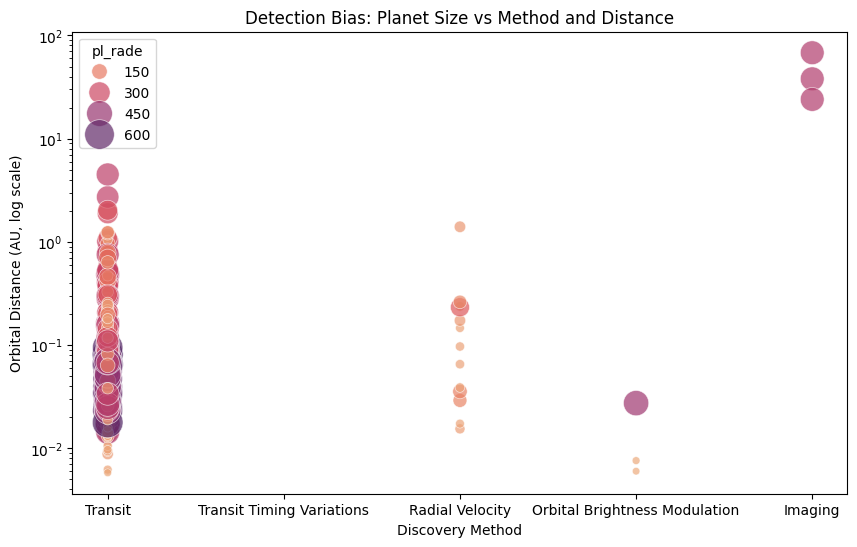

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x="pl_discmethod", 
    y="pl_orbsmax", 
    size="pl_rade", 
    sizes=(20, 500),
    alpha=0.7,
    palette="flare",
    hue="pl_rade",
)

plt.yscale("log")
plt.xlabel("Discovery Method")
plt.ylabel("Orbital Distance (AU, log scale)")
plt.title("Detection Bias: Planet Size vs Method and Distance")
plt.show()

**Figure 3:** When comparing size to orbital distance, a pattern appears in the transit section. There seems to be a hard cut off line, where only smaller planets are found within a certain distance from its sun.
***

## 4. Discussion

### 4.1 Key Findings

Figure 1 shows that the transit method makes up over 99% of exoplanet discoveries. Discovering a planet this way requires a measureable dip in a star's brightness, indicating an object passing in front of it and blocking its light. The brightness can be monitored over time in order to find the data recorded in the table used for this analyses. The requirement for this to work is a planet big enough to block out the light, as an Earth-sized planet hundreds of light years away would not block out any notiecable amount of light.

Figure 2 proves this theory through a heatmap that analyzes each method more. Not only does the transit method account for over 99% of discoveries, but Super-Jupiters make up over 99% planets discovered through that method. This shows a clear relation to the size of a planet and its likeliness of being detected. While planets similar in size to Jupiter have been found, all exoplanets discovered have been bigger than the largest one in our solar system.

At this point, the dominant discovery method has been proven to favour massive planets over small planets, but there is no proof of those smaller planets existing. Figure 3 provides an understanding for why smaller planets should be more common than the data initially shows. In our solar system, terrestrial planets made of solid materials are significantly smaller than Jupiter and much closer to the sun. There is a hard cut off in Figure 3 where no Super-Jupiters have been found within a certain distance of the sun. These terrestrial planets make up half of our solar system, and should be the explanation for this hard cut off. Larger gas giants can't form within a specific radius of the sun due to the heat from being that close. Based on our solar system, it would make sense for small terrestrial planets which are undetectable to us to make up that region closer to the suns.
***

### 4.2 Connection to Hypothesis

My hypothesis was that discovery methods of exoplanets create a bias towards the size of planets found outside of our solar system, and that smaller planets should be more common than the data suggests. Figures 1 and 2 provide proof that our discovery methods are much better at finding large planets, while figure 3 provides an explanation of where the smaller planets may be found.

In summary, using the transit method on thousands of planets appears to show that the galaxy is dominated by large Super-Jupiters, however, a closer look at the data would suggest that smaller planets make up a substantial but underrepesented portion of planets in the Milky Way.
***

# 6. References

My data set was found on Kaggle: https://www.kaggle.com/datasets/santoshd3/nasa-exoplanet-archive/data

I referred to several pages on the seaborn website for syntax: https://seaborn.pydata.org/index.html